# Intro Unsupervised Learning

![](https://media.giphy.com/media/kZJcpM3gYdlK4D64Ft/giphy.gif)

## When do we use Unsupervised Learning?

**Examples:** (When there are no labels)

+ Customer segmentation
+ Product segmentation
+ One-person segment (what works for one group doesn't necessarily work for another)
+ Grouping according to characteristics

**Situation**

Each element (user, customer, product...) can be considered a vector. Given a package of vectors, they are distributed by clusters. Similar vectors will be in the same cluster, and similar clusters will be 'closer' to each other than those that are more different.

All this proceeding assumes the existence of a distance metric, so that distance between vectors within the vector space can be measured.

**Steps to apply USL:**

+ **1**: Vector representation
+ **2**: Metric, distance function
+ **3**: Similarity measure

When creating a cluster, the vector in the center of the cluster (centroid) is considered the prototype or the most representative of the cluster.


**Problems treatable by USL:**

+ Market segmentation
+ Detection of fraud in insurance or banking
+ Response to medical treatments
+ Outlier detection

**Examples of models:**

+ K-Means
+ Hierarchical Clustering
+ DBSCAN
+ HDBSCAN
+ GMM

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Viz mantra

%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## PCA
**Main Component Analysis**
Principal Component Analysis (PCA) is a statistical method that allows simplifying the complexity of sample spaces with many dimensions while preserving their information. Suppose there is a sample with n individuals each with p variables (X1, X2, …, Xp), that is, the sample space has p dimensions. PCA allows to find a number of underlying factors (z<p) that explain approximately the same as the original p variables. Where before p values ​​were needed to characterize each individual, now z values ​​suffice. Each of these z new variables is called the principal component.

Principal Component Analysis belongs to the family of techniques known as unsupervised learning. The supervised learning methods described in previous chapters have the objective of predicting a response variable Y from a series of predictors. To do this, we have p characteristics (X1, X2 … Xp) and the response variable Y measured in n observations. In the case of unsupervised learning, the response variable Y is not taken into account since the objective is not to predict Y but to extract information using the predictors, for example, to identify subgroups. The main problem faced by unsupervised learning methods is the difficulty in validating the results given that there is no response variable available that allows them to be contrasted.

The PCA method therefore allows "condensing" the information provided by multiple variables into just a few components. This makes it a very useful method to apply after using other statistical techniques such as regression, clustering... Even so, we must not forget that it is still necessary to have the value of the original variables to calculate the components.

In [42]:
iris = sns.load_dataset("iris")

In [46]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
20,5.4,3.4,1.7,0.2,setosa
67,5.8,2.7,4.1,1.0,versicolor
81,5.5,2.4,3.7,1.0,versicolor
114,5.8,2.8,5.1,2.4,virginica
11,4.8,3.4,1.6,0.2,setosa
104,6.5,3.0,5.8,2.2,virginica
73,6.1,2.8,4.7,1.2,versicolor
134,6.1,2.6,5.6,1.4,virginica
139,6.9,3.1,5.4,2.1,virginica


In [47]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

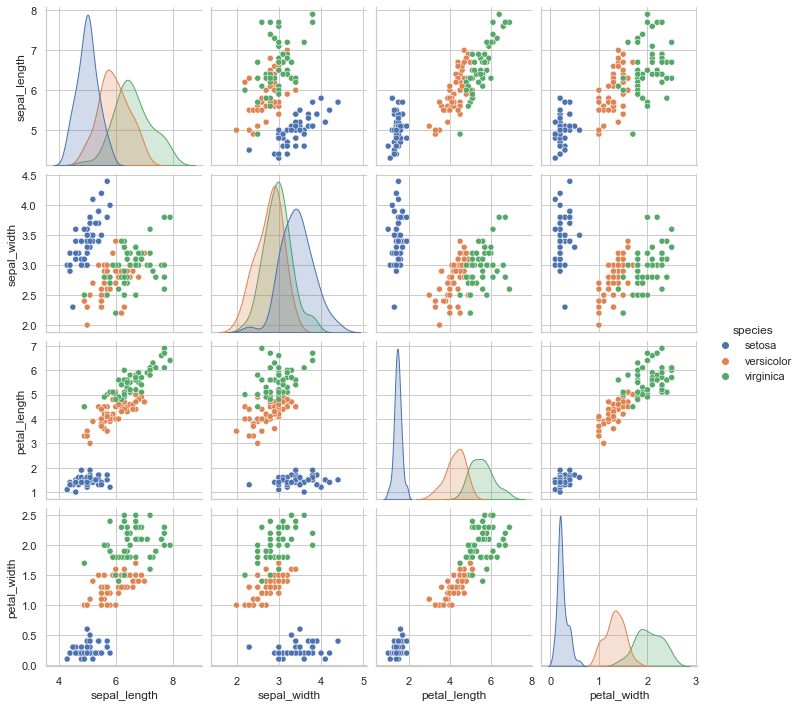

In [48]:
# PCA using Sklearn
sns.pairplot(iris, hue="species")

In [50]:
from sklearn.decomposition import PCA

The result after doing fit_transform is that where we had 4 features we now have 2

In [51]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
pca = PCA(2)
iris_t = pd.DataFrame(pca.fit_transform(iris.drop(columns="species")), columns=["PC1", "PC2"])

In [53]:
iris_t.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [54]:
# DF: PC1, PC2 & Species
complete = iris_t.copy()
complete["species"] = iris["species"]

In [55]:
complete.head()

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


## Deciding on the amount of components

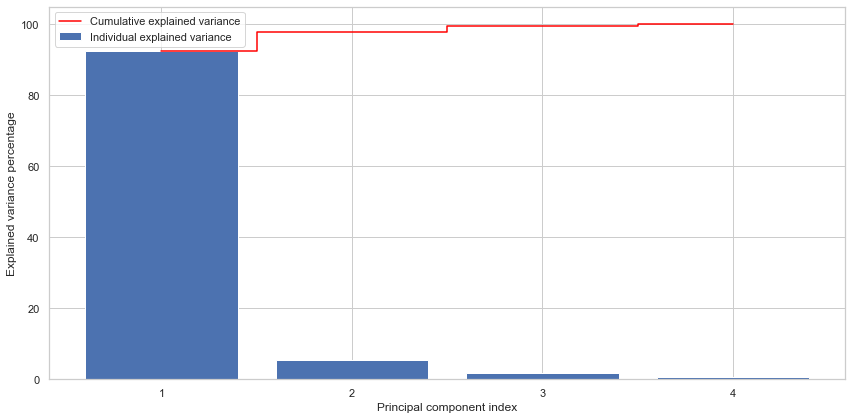

In [56]:
# Initializing
pca = PCA(n_components=None)
pca.fit(iris.drop(columns="species"))

# Calculating variance
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

# Plotting
plt.bar(range(1, 5), exp_var, align='center',label='Individual explained variance') #bars
plt.step(range(1, 5), cum_exp_var, where='mid', label='Cumulative explained variance', color='red') #line

# Axis
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
plt.tight_layout()

In [60]:
# Having the least amount of components without sacrificing the variance on the dataset

In [59]:
cum_exp_var # qe can go for two

array([ 92.46187232,  97.76852063,  99.47878161, 100.        ])

pca.components has shape `[n_components, n_features]`

In [57]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

## K-Means


The oldest and the most popular. The idea is to previously select how many clusters are desired ($k$). The central points of the cluster (centroids) are selected randomly. For each new record, a cluster is reassigned and the centroid (mean) is recalculated. The process is iterated until there is no change in clustering.

![kmeans](../images/kmeans.png)

![kmeans2](../images/kmeans2.png)

Wait didn't we see KNN already?

KNN is supervised for classification. K-means is unsupervised for clustering

In [61]:
from sklearn.cluster import KMeans
import pandas as pd

/Users/fernandocosta/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


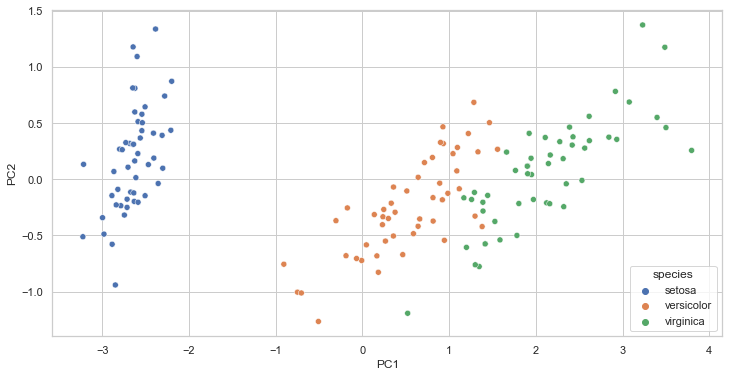

In [62]:
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris["species"]);

## We standardize the data

**Since KMeans is based on distance** and our variables have very different variances, even though they have the same unit, it would be a good idea to standardize the data if we had not done PCA.
Anyway, I leave you an example of how the data would look.

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
dat_ = iris.copy()

In [65]:
dat_.drop(columns="species", inplace=True)

In [66]:
dat_.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(dat_), columns=dat_.columns)
df_scaler.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Train the algorithm

### K-Means with the two PCA

Since we are testing and understanding the algorithm, we are going to enter the number of clusters by hand

In [68]:
km = KMeans(n_clusters=3)
km.fit(iris_t)

KMeans(n_clusters=3)

In [69]:
y_pred = km.predict(iris_t)

In [70]:
iris_t["predict"] = y_pred

In [73]:
iris_t["real_ground_truth"] = iris["species"]

In [77]:
iris_t.sample(10)

,PC1,PC2,predict,real_ground_truth
98,-0.906470,-0.756093,2,versicolor
9,-2.672756,-0.113774,1,setosa
90,0.464800,-0.670712,2,versicolor
123,1.388766,-0.204399,2,virginica
17,-2.648297,0.311849,1,setosa
91,0.890815,-0.034464,2,versicolor
89,0.166413,-0.681927,2,versicolor
93,-0.704532,-1.012248,2,versicolor
77,1.557802,0.267495,0,versicolor
45,-2.714451,-0.250208,1,setosa


In [79]:
crosstab = pd.crosstab(iris_t.predict, iris_t.real_ground_truth)

In [88]:
crosstab

real_ground_truth,setosa,versicolor,virginica
predict,,,
0,0,3,36
1,50,0,0
2,0,47,14


### K-Means with all the features

In [81]:
km2 = KMeans(n_clusters=3)
km2.fit(df_scaler)

KMeans(n_clusters=3)

In [82]:
y_four = km2.predict(df_scaler)

In [83]:
df_scaler["real"] = iris.species
df_scaler["kmeans"] = y_four

In [98]:
df_scaler.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,real,kmeans
27,-0.779513,1.019004,-1.283389,-1.315444,setosa,1
40,-1.021849,1.019004,-1.397064,-1.183812,setosa,1
72,0.553333,-1.282963,0.649083,0.395774,versicolor,0
82,-0.052506,-0.822570,0.080709,0.000878,versicolor,0
38,-1.748856,-0.131979,-1.397064,-1.315444,setosa,1
34,-1.143017,0.098217,-1.283389,-1.315444,setosa,1
110,0.795669,0.328414,0.762758,1.053935,virginica,2
22,-1.506521,1.249201,-1.567576,-1.315444,setosa,1
146,0.553333,-1.282963,0.705921,0.922303,virginica,0
119,0.189830,-1.973554,0.705921,0.395774,virginica,0


In [87]:
cross2 = pd.crosstab(df_scaler.kmeans, df_scaler.real)
cross2

real,setosa,versicolor,virginica
kmeans,,,
0,0,39,14
1,50,0,0
2,0,11,36


In [92]:
crosstab # Crosstab with PC1 & PC2

# versicolor: 2
# setosa: 1
# virignica: 0

real_ground_truth,setosa,versicolor,virginica
predict,,,
0,0,3,36
1,50,0,0
2,0,47,14


In [93]:
cross2 # Crosstab without PCA: with all 4 features

real,setosa,versicolor,virginica
kmeans,,,
0,0,39,14
1,50,0,0
2,0,11,36


## Let's plot it

/Users/fernandocosta/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fernandocosta/opt/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


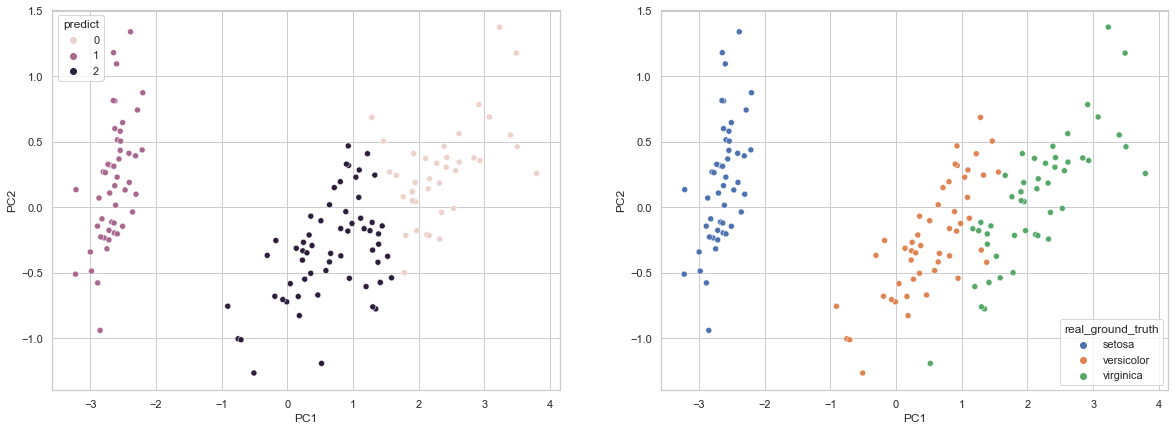

In [96]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris_t["predict"], ax=axs[0]);
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris_t["real_ground_truth"], ax=axs[1]);

## We measure the model / (Silhouette Score)
silhouette punctuation
The silhouette score is a metric of the separation of the clusters.

It ranges from -1 to 1, where negative values ​​mean that the clusters are misallocated, 0 means that the clusters overlap, and 1 means that the clusters are separated and defined.

In [100]:
from sklearn.metrics import silhouette_score

### Score of the kmeans with the data WITH PCA

In [104]:
iris_t_onlypcs = iris_t.drop(columns=["predict", "real_ground_truth"])

In [105]:
silhouette_score(iris_t_onlypcs, y_pred)

0.597676421954799

### Score of the kmeans with the data WITHOUT PCA

In [108]:
df_scaler_features = df_scaler.drop(columns=["real", "kmeans"])

In [109]:
silhouette_score(df_scaler_features, y_four)

0.45994823920518646

## Elbow method
Probably the best known method, where you calculate and plot the sum of squares at each number of clusters, and there you look for a change in slope from steep to shallow to determine the optimal number of clusters. This method is inaccurate, but still potentially useful.

The elbow curve method is useful because it shows how increasing the number of clusters contributes to separating the clusters in a significant, not marginal, way. The curve indicates that additional groups beyond the third have little value. The elbow method is pretty neat, but a naive solution based on intracluster variance. The gap statistic is a more sophisticated method of dealing with data that has a distribution with no obvious clustering.

This method works as follows: the sum of squared errors within the cluster is calculated for different values ​​of K and the K is chosen for which the sum of squared errors begins to decrease. This is visible as an elbow.

Sum within a group of squared errors sounds a bit complex. Let's break it down:

The squared error for each point is the square of the point's distance from its plot, that is, its predicted cluster center.
The sum of squared errors score is the sum of these squared errors for all points.
Any distance metric can be used, such as the Euclidean distance or the Manhattan distance.
Now, to apply the elbow method and obtain the optimal number of clusters, it can be done as follows:

Compute the clustering algorithm for different values ​​of K. For example, varying K from 1 to 10 clusters.
For each K, compute the total sum of squares within the cluster.
Plot the curve of the sum of squared errors according to the number of groups K.
The location of a curve, elbow, on the graph is generally considered to be an indicator of the appropriate number of groups.

**Inertia error method**: The more variety there is between the observations in the dataset, the greater their distances from their associated centroids. The inertia or intertia, in the context of K-Means, is the sum of all the distances of the observations of a cluster to its centroid. Assuming that the objective is to reduce the sum of distances (squares) of points with their respective centroids, the lower this total sum, the better, since it will indicate a greater homogeneity in the observations belonging to the created clusters.

In [110]:
kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(dat_)

In [111]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

[681.3706, 152.34795176035792, 78.85144142614601]

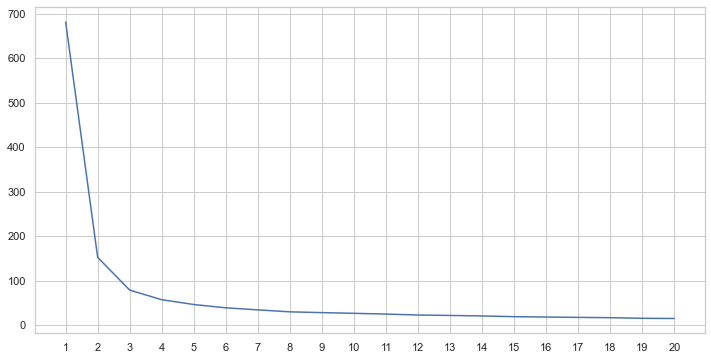

In [112]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

We see that the exact cluster point we need to do for our data is 3

## Mini-recap

- PCA
- K-means

For both of these things, we don't know how many we should start with

- PCA: cummulative variance: decide on X given PC
- K-means: elbow method, we can have the appropiate number of clusters